In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [3]:
root = '/Volumes/DATA/adv-exp-physics/advancedlab3/data/20171115'
pos = 'pos.dat'
spec = 'spec.FDdat'
T = 262.84
v = 8.9e-4
d = 3e-6
beta = 3*np.pi*v*d
mAarray = np.floor(np.linspace(25, 275,11)).astype(int)
runarray = [1,2,3]
def powerfunc(f,P0,f0):
    return (P0*f0**2)/(f**2 + f0**2)

In [4]:
meansquare_array = np.zeros((11,3))
for i in range(11):
    for j in range(3):
        mA = mAarray[i]
        run = runarray[j]
        x, y, s = np.loadtxt(os.path.join(root,str(mA),str(run),pos), unpack=True)
        x = x*1e-6
        y = y*1e-6
        xmean = np.average(x)
        ymean = np.average(y)
        meansquare = np.average((x-xmean)**2 + (y-ymean)**2)
        meansquare_array[i,j] = meansquare

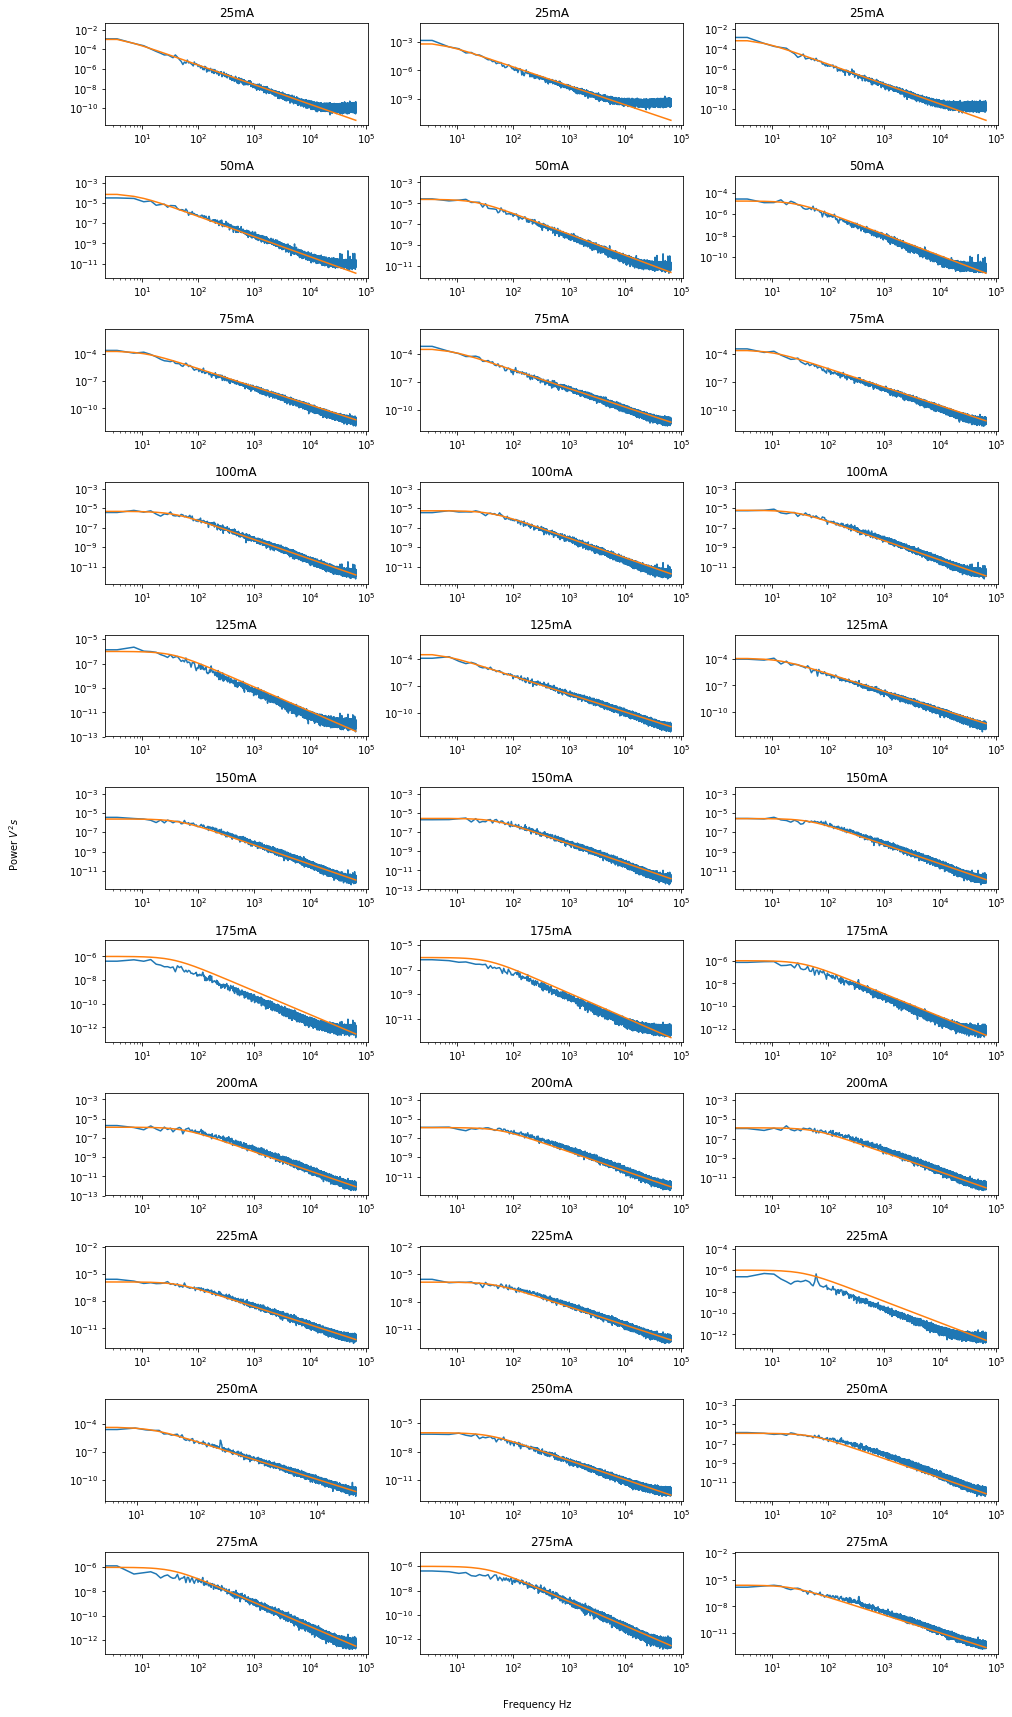

In [48]:
f0_array = np.zeros((11,3))

fig, ax = plt.subplots(11,3, figsize=(16,30))
plt.subplots_adjust(hspace=.5)

fig.text(0.5, 0.1, 'Frequency Hz', ha='center')
fig.text(0.04, 0.5, r'Power $V^2 s$', va='center', rotation='vertical')

for i in range(11):
    for j in range(3):
        mA = mAarray[i]
        run = runarray[j]
        df = pd.read_table(os.path.join(root,str(mA),str(run),spec),sep='\s|,',engine='python',header=None,skiprows=4)
        f = df.values[:,0]
        intensity = df.values[:,1]
        try:
#             p0 = [1e-6,20]
            p0 = [1e-6,35]
            params, mat = curve_fit(powerfunc, f[2:], intensity[2:], p0=p0, bounds=([1e-8,0], [1e-2,100]))
            P0 = params[0]
            f0 = params[1]
            sigP0 = mat[0,0]
            sigf0 = mat[1,1]
            
            ax[i,j].loglog(f, intensity)
            ax[i,j].loglog(f,powerfunc(f, params[0], params[1]))
            ax[i,j].set_title('{:2d}mA'.format(mA))
            
            f0_array[i,j] = f0
        except:
            continue

$\alpha = f_0 2 \pi \beta$

In [49]:
alpha_array = 2*np.pi*beta*f0_array

In [50]:
meansquare_std = np.std(meansquare_array,axis=1)
alphaprime_std = np.std(alpha_array, axis=1)
meansquare_avg = np.average(meansquare_array, axis=1)
alphaprime_avg = np.average(alpha_array, axis=1)

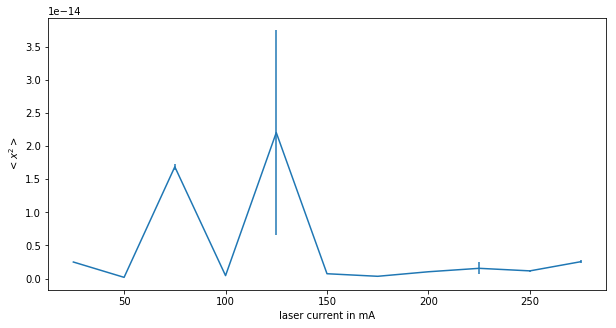

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
ax.errorbar(mAarray,meansquare_avg,meansquare_std)
ax.set_ylabel(r'$<x^2>$')
ax.set_xlabel('laser current in mA');

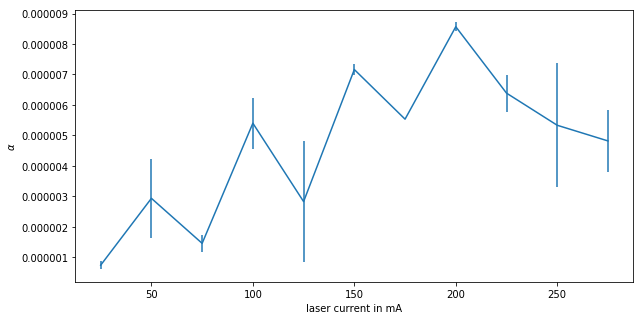

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
ax.errorbar(mAarray,alphaprime_avg,alphaprime_std)
ax.set_ylabel(r'$\alpha$')
ax.set_xlabel('laser current in mA');

$\alpha = \frac{k_b T}{<x^2>}$
Thus
$k_b = \frac{\alpha <x^2>}{T}$

In [53]:
estimate_kb = (meansquare_avg*alphaprime_avg/T)
estimate_kb_std = estimate_kb*((meansquare_std/meansquare_avg)**2 + (alphaprime_std/alphaprime_avg)**2.)**(1/2.)

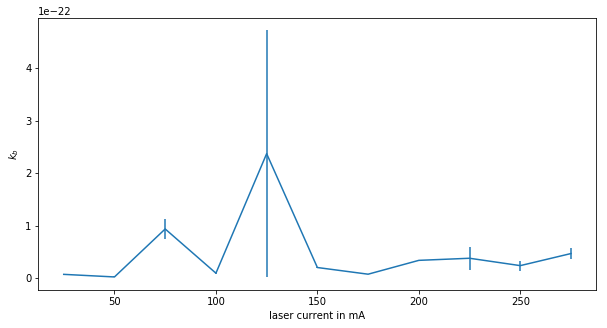

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
ax.errorbar(mAarray,estimate_kb,estimate_kb_std)
ax.set_ylabel(r'$k_b$')
ax.set_xlabel('laser current in mA');

In [55]:
weights = estimate_kb_std**-2
avg_kb = np.sum(estimate_kb*weights)/np.sum(weights)
avg_kb_error = (np.sum(weights)**-1)**(1/2.)
print avg_kb, avg_kb_error

1.51862021725e-23 2.6804446267e-25


In [56]:
print f0_array

[[  3.47850465   5.0010686    5.58564354]
 [  7.38593999  21.43427101  26.87237055]
 [ 10.93863131   6.76487317   9.95266086]
 [ 35.94652549  39.54564717  26.97897145]
 [ 35.           5.24961212  13.4118219 ]
 [ 44.83254665  46.78412294  44.2857421 ]
 [ 35.          35.          35.        ]
 [ 53.0168556   55.22222248  54.33535873]
 [ 42.79400804  43.42298198  35.        ]
 [ 17.37397153  35.          48.81953211]
 [ 35.          35.          21.44189013]]
